In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gender-equality-un-unpaid-work-data/unpaid_work.csv


In [2]:
df = pd.read_csv('/kaggle/input/gender-equality-un-unpaid-work-data/unpaid_work.csv',encoding = "ISO-8859-1")

In [3]:
df.shape #796,8
#check for null values
df.isna().sum() #Area field has most of the null values, thus can be avoided being used in analysis

Age                       0
Area                    728
Country                   0
Survey Availability       0
Time use                  0
Year                      0
Average Time (hours)      6
Gender                    0
dtype: int64

In [4]:
df.dtypes

Age                      object
Area                     object
Country                  object
Survey Availability      object
Time use                 object
Year                     object
Average Time (hours)    float64
Gender                   object
dtype: object

In [5]:
df_copy = df.copy()
df_copy['Age'].value_counts()
#Age colummn is differently classified and can be standardised based on EOCD labour classification
#15-24
#25-54
#55-64

15+            224
20 to 74       152
10+            144
12+             88
15 to 64        28
6 to 65         16
16 to 74        16
18+             12
15 to 74        12
19 to 65        12
6+               8
16+              8
5+               8
20 to 64         8
Unknown age      8
15 to 80         8
15 to 60         8
14+              8
15 to 49         8
15+?             4
15 to 84         4
10 to 74         4
15 to 59         4
20 to 59         4
Name: Age, dtype: int64

In [6]:
df_copy['Survey Availability'].value_counts()
#Upto 1984
#1985-1994
#1995-2004
#1997-1998 
#1998-00 
#2004-05
#2006-07
#2005 and later
#2015


2005 and later    468
1995 - 2004       276
1985 - 1994        12
2015               12
1998-00             8
Up to 1984          8
1997-98             4
2004-05             4
2006-07             4
Name: Survey Availability, dtype: int64

In [7]:
#Replace and change the groups for 10 years data each
df_copy['Survey Availability'] = df_copy['Survey Availability'].map({'Up to 1984':'Up to 1984','1985 - 1994':'1985 - 1994',
                                                                     '1995 - 2004':'1995 - 2004','2005 and later':'2005 and later',
                                                                     '1997-98': '1995 - 2004', '1998-00': '1995 - 2004', 
                                                                     '2004-05':'2005 and later', '2006-07':'2005 and later'})

df_copy['Survey Availability'].value_counts()
#after changing
#upto 1984
#1985-1994
#1995-2004
#2005 and later
#Now it's much better

2005 and later    476
1995 - 2004       288
1985 - 1994        12
Up to 1984          8
Name: Survey Availability, dtype: int64

In [8]:
df_copy['Time use'].value_counts()

Unpaid domestic, care and volunteer work    398
Paid and subsistence work                   398
Name: Time use, dtype: int64

In [9]:
#group data by survey availability,country, gender,time use and age
df_copy.shape #796, 8
df_new = df_copy.groupby(['Survey Availability','Year','Country','Gender','Time use','Age']).mean().reset_index()

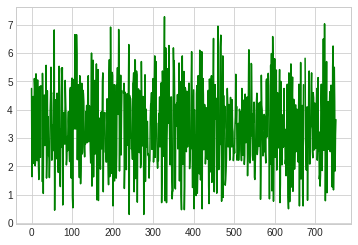

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()
plt.plot(df_new['Average Time (hours)'], color='g')  # solid green

In [11]:
df_new.shape #752, 7
#We are just left with age column to be cleaned
df_new.Age.value_counts()

15+            200
20 to 74       152
10+            144
12+             80
15 to 64        28
16 to 74        16
18+             12
15 to 74        12
19 to 65        12
Unknown age      8
6+               8
16+              8
5+               8
20 to 64         8
15 to 60         8
15 to 80         8
14+              8
6 to 65          8
15+?             4
15 to 84         4
10 to 74         4
15 to 59         4
20 to 59         4
15 to 49         4
Name: Age, dtype: int64

In [12]:
#we will change the age column to have three different columns, lower, upper and average age value
df_new['Age'] = df_new['Age'].str.replace('+',' to 84',regex=True) #Adding end range as 84 as this is the standard maximum value 
                                                                   #considered in maxiumum cases

df_new['min_age'] = df_new.Age.str.split('\s+').str[0]
df_new['max_age'] = df_new.Age.str.split('\s+').str[-1]

df_new.head()

,Survey Availability,Year,Country,Gender,Time use,Age,Average Time (hours),min_age,max_age
0,1985 - 1994,1987,Denmark,Men,Paid and subsistence work,16 to 74,4.750000,16,74
1,1985 - 1994,1987,Denmark,Men,"Unpaid domestic, care and volunteer work",16 to 74,1.633333,16,74
2,1985 - 1994,1987,Denmark,Women,Paid and subsistence work,16 to 74,3.300000,16,74
3,1985 - 1994,1987,Denmark,Women,"Unpaid domestic, care and volunteer work",16 to 74,3.050000,16,74
4,1985 - 1994,1992,Australia,Men,Paid and subsistence work,15 to 84,4.466667,15,84


In [13]:
df_new['min_age'].value_counts()
df_new['max_age'].loc[(df_new['max_age'] == "age")] = "Unknown"
df_new['max_age'] = df_new['max_age'].str.replace('?','',regex=True)
df_new['max_age'].value_counts()

df_unknown = df_new[(df_new['min_age']=='Unknown') & (df_new['max_age']=='Unknown')]
df_known = df_new[(df_new['min_age']!='Unknown') & (df_new['max_age'] != 'Unknown')]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df_known['min_age']=df_known['min_age'].astype(int)
df_known['max_age']=df_known['max_age'].astype(int)
df_known['avg_age'] = (df_known['min_age']+df_known['max_age'])//2
df_unknown['avg_age'] = "Unknown"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [15]:
df_known.head()
df_unknown.head()
#merge both df
df_new = df_known.append(df_unknown)
df_new.shape

(752, 10)

In [16]:
#Create a time use flag unpaid and paid for better visualization
df_new['timeuseflag'] = df_new['Time use'].apply(lambda x: 'Paid' if 'Unpaid' not in x else 'Unpaid')

df_new.head()
#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

,Survey Availability,Year,Country,Gender,Time use,Age,Average Time (hours),min_age,max_age,avg_age,timeuseflag
0,1985 - 1994,1987,Denmark,Men,Paid and subsistence work,16 to 74,4.750000,16,74,45,Paid
1,1985 - 1994,1987,Denmark,Men,"Unpaid domestic, care and volunteer work",16 to 74,1.633333,16,74,45,Unpaid
2,1985 - 1994,1987,Denmark,Women,Paid and subsistence work,16 to 74,3.300000,16,74,45,Paid
3,1985 - 1994,1987,Denmark,Women,"Unpaid domestic, care and volunteer work",16 to 74,3.050000,16,74,45,Unpaid
4,1985 - 1994,1992,Australia,Men,Paid and subsistence work,15 to 84,4.466667,15,84,49,Paid


In [17]:
df_new.to_csv('unpaid_work_final.csv')